## Linear Regression

> Given input and it can predict the output. It is the mapping from input point to a continous value

#### Correlation and Linear Regression
- Correlation 
    - Single measure of relationship between two variables
- Linear Regression
    - An equation used for prediction 

In [1]:
import pandas as pd 
data = pd.read_csv('weight_height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


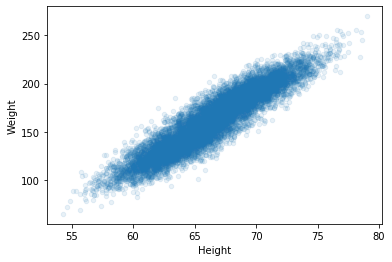

In [2]:
data.plot.scatter(x='Height',y='Weight',alpha=.1)

In [3]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [4]:
# Importing linear regression model 
from sklearn.linear_model import LinearRegression

In [5]:
lin = LinearRegression()
lin.fit(data[['Height']],data[['Weight']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

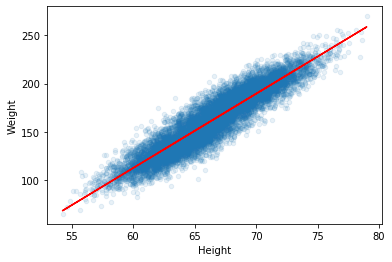

In [6]:
ax = data.plot.scatter(x='Height',y='Weight',alpha=.1)
ax.plot(data['Height'],lin.predict(data[['Height']]),c='r')

In [8]:
from sklearn.metrics import r2_score

In [11]:
r2_score(data['Weight'],lin.predict(data[['Height']]))

0.8551742120609958

In [15]:
lin.score(data[['Height']],data['Weight'])

0.8551742120609956

## Predict Players using LR

In [16]:
# Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [17]:
soc = pd.read_parquet('soccer.parquet')

In [18]:
soc.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [19]:
len(soc)

183978

In [31]:
soc.shape

(183978, 41)

In [20]:
soc.dtypes

player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penaltie

In [23]:
soc1=soc.select_dtypes(include='number')
soc1.head()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [25]:
soc1.isnull().sum()/len(soc1)*100

player_fifa_api_id    0.000000
player_api_id         0.000000
overall_rating        0.454402
potential             0.454402
crossing              0.454402
finishing             0.454402
heading_accuracy      0.454402
short_passing         0.454402
volleys               1.474633
dribbling             0.454402
curve                 1.474633
free_kick_accuracy    0.454402
long_passing          0.454402
ball_control          0.454402
acceleration          0.454402
sprint_speed          0.454402
agility               1.474633
reactions             0.454402
balance               1.474633
shot_power            0.454402
jumping               1.474633
stamina               0.454402
strength              0.454402
long_shots            0.454402
aggression            0.454402
interceptions         0.454402
positioning           0.454402
vision                1.474633
penalties             0.454402
marking               0.454402
standing_tackle       0.454402
sliding_tackle        1.474633
gk_divin

In [26]:
soc1= soc1.dropna()

In [27]:
soc1.head()

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
len(soc1)

181265

In [29]:
soc1.corr()['overall_rating'].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.770963
potential             0.765674
short_passing         0.458122
ball_control          0.444183
long_passing          0.434789
vision                0.431137
shot_power            0.427842
penalties             0.392717
long_shots            0.392660
positioning           0.369469
volleys               0.361470
curve                 0.357772
crossing              0.357655
dribbling             0.354369
free_kick_accuracy    0.349931
finishing             0.330116
stamina               0.326114
aggression            0.323084
strength              0.316421
heading_accuracy      0.313541
jumping               0.259023
sprint_speed          0.253333
interceptions         0.249475
acceleration          0.244180
agility               0.239896
standing_tackle       0.164780
balance               0.160364
marking               0.132857
sliding_tackle        0.128889
gk_kicking            0.028156
gk_diving             0.027215
gk_posit

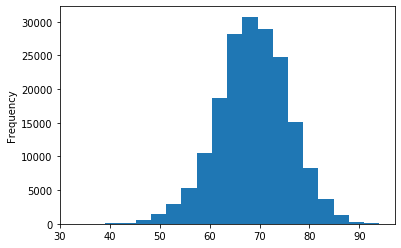

In [32]:
soc1['overall_rating'].plot.hist(bins=20)

In [33]:
soc1['overall_rating'].describe()

count    181265.000000
mean         68.621493
std           7.029845
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [34]:
soc1.corr()['overall_rating'].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.770963
potential             0.765674
short_passing         0.458122
ball_control          0.444183
long_passing          0.434789
vision                0.431137
shot_power            0.427842
penalties             0.392717
long_shots            0.392660
positioning           0.369469
volleys               0.361470
curve                 0.357772
crossing              0.357655
dribbling             0.354369
free_kick_accuracy    0.349931
finishing             0.330116
stamina               0.326114
aggression            0.323084
strength              0.316421
heading_accuracy      0.313541
jumping               0.259023
sprint_speed          0.253333
interceptions         0.249475
acceleration          0.244180
agility               0.239896
standing_tackle       0.164780
balance               0.160364
marking               0.132857
sliding_tackle        0.128889
gk_kicking            0.028156
gk_diving             0.027215
gk_posit

In [39]:
X = soc1.drop(['overall_rating','potential'],axis=1)
y = soc1['overall_rating']

,player_fifa_api_id,player_api_id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [41]:
lin = LinearRegression()

In [42]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
y_pred = lin.predict(X_test)

In [45]:
r2_score(y_test,y_pred)

0.7838867560302791